# پروژه 5 فاز 1
# شبکه های عصبی
## امیرمهدی محمدیان
## 810197651

در این پروژه قصد داریم که یک شبکه عصبی بسازیم و داده های هجا در خط هیرگانا را بتونیم تشخیص بدیم

برای اینکار به ما کد ناقصی از این شبکه عصبی داده شده است که باید آن را کامل کنیم

سپس با تحلیل و امتحان کردن متغیر های مختلف از جمله اکتیویشن فانکشن ها و بچ سایز و لرنینگ ریت و... ببنیم که هرکدام چه تاثیری روی نتایج ما میگذارد

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Dataloader

In [434]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        one_hot_vectors = np.zeros((labels.shape[0],labels['0'].max() + 1))
        one_hot_vectors[np.arange(labels.size),labels['0']] = 1
        return pd.DataFrame(one_hot_vectors)
    
    def __shuffle_dataset(self):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        index = np.random.permutation(len(self.__data))
        a = self.__data.iloc[index]
        b = self.__onehot_labels.iloc[index]
        self.__data = a
        self.__onehot_labels = b
        self.__data = self.__data.reset_index()
        self.__onehot_labels = self.__onehot_labels.reset_index()
        self.__data.drop(['index'], axis=1, inplace=True)
        self.__onehot_labels.drop(['index'], axis=1, inplace=True)
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [422]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        relu_value = np.matrix(matrix, dtype=float)#got this part from the class above
        relu_value[relu_value <= 0] = 0
        return relu_value

    def derivative(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(matrix, dtype=float) 
        ma[ma > 0] = 1
        ma[ma < 0] = 0
        return ma #relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(matrix, dtype=float)
        ma[ma < 0] = np.array(ma[ma < 0].dot(0.01))[0]
        return ma #leacky_relu_value

    def derivative(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(matrix, dtype=float)
        ma[ma >= 0] = 1
        ma[ma < 0] = 0.01
        return ma
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1 + np.exp(-ma))
        return sigmoid_value

    def derivative(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.multiply((1/(1 + np.exp(-ma))), (1 - (1/(1 + np.exp(-ma)))))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        #could need change
        ma = np.matrix(matrix, dtype=float)
        softmax_value =  np.exp(ma - ma.max(axis=1).reshape(-1,1)) / np.exp(ma - ma.max(axis=1).reshape(-1,1)).sum(axis=1).reshape(-1,1)
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        return np.tanh(np.matrix(matrix, dtype=float))

    def derivative(self, matrix):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        return (1 - np.multiply(np.tanh(np.matrix(matrix, dtype=float)), np.tanh(np.matrix(matrix, dtype=float)))) 
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

In [390]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(true_val, dtype=float)
        val = Softmax().__call__(expected_val)
        temp = np.multiply(ma, np.log(val))
        return -np.sum(temp) #cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        ma = np.matrix(true_val, dtype=float)
        val = Softmax().__call__(expected_val)
        return val - ma #cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [403]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def output_getter(self):
        return self.__last_activation_output
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        #copy could cause bug
        self.__last_input = layer_input.copy()
        self.__last_activation_input = np.dot(self.__last_input, self.__weight) + self.__bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = self.activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        #transpose could cause bug or -=
        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        dw = np.matmul(self.__last_input.transpose(), dy)
        backprop_tensor = np.matmul(dy, self.__weight.transpose())
        self.__weight = self.__weight - lr * dw
        db = np.matmul(np.matrix(np.zeros(dy.shape[0])) + 1, dy)
        self.__bias = self.__bias - lr * db

        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        w = np.random.uniform(low, high, size=(dim1, dim2))
        return w.reshape(dim1,dim2) #weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        w = np.random.normal(mean, np.sqrt(var), size=(dim1, dim2))
        return w #weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [392]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch))
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        out = self.forward(x_batch)
        batch_average_loss = np.mean(self.__loss(out, y_batch))
        batch_accuracy = self.__compute_accuracy(out, y_batch)
        self.__update_weights(out, y_batch)       
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        out = self.forward(x_batch)
        batch_average_loss = self.__loss(out, y_batch).mean()
        batch_accuracy = self.__compute_accuracy(out, y_batch)  
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        labels = outputs.argmax(axis=1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        correct = (output.argmax(axis=1) == expected_output.argmax(axis=1)).sum()
        return correct / len(output) #accuracy
    
    
    def __update_weights(self, output, y_train):
        # TODO: Implement -------------------------------------------DONE-------------------------------------------
        deriv = self.__loss.derivative(y_train,output)
        for i in reversed(range(len(self.__layers_list))):
            deriv = self.__layers_list[i].update_weights(deriv, self.__lr)
        return

# Phase #1

In [44]:
train = pd.read_csv('./dataset/train_images.csv')
trainlabel = pd.read_csv('./dataset/train_labels.csv')
test = pd.read_csv('./dataset/test_images.csv')
testlabel = pd.read_csv('./dataset/test_labels.csv')

برای اینکه پس از ایجاد دیتا فریم ها، تغییرات باعث ایجاد مشکل نشوند یک کپی از هرکدام نگه میداریم

In [240]:
df = train.copy()
dfl = trainlabel.copy()
dft = test.copy()
dftl = testlabel.copy()

In [242]:
df = df.drop(['Unnamed: 0'], axis = 1)
dfl = dfl.drop(['Unnamed: 0'], axis = 1)
dft = dft.drop(['Unnamed: 0'], axis = 1)
dftl = dftl.drop(['Unnamed: 0'], axis = 1)

In [243]:
trainlabel

,Unnamed: 0,0
0,0,19
1,1,7
2,2,4
3,3,15
4,4,12
...,...,...
59995,59995,12
59996,59996,15
59997,59997,2
59998,59998,7


تابعی مینویسیم که با استفاده از آن بتوانیم یک تصویر را نمایش بدهیم

In [118]:
def display(img):  
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

یک تصویر به دلخواه انتخاب کرده، آن را نمایش داده و محدوده پیکسل ها را درمیاوریم:

min range of pixle activation:  0
max range of pixle activation:  255


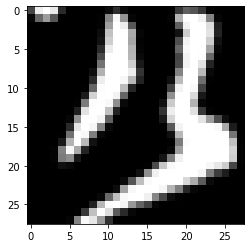

In [124]:
random_img = random.randint(0, 60000)
img = train.iloc[random_img].to_numpy()
img = np.delete(img, 0)
print("min range of pixle activation: ", np.amin(img))
print("max range of pixle activation: ", np.amax(img))
display(img)

حال از هر کلاس یک تصویر را نمایش میدهیم


	====== Class: 0 ======


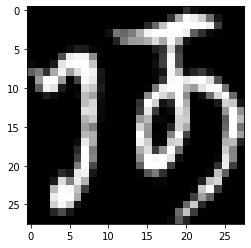


	====== Class: 1 ======


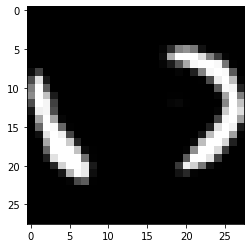


	====== Class: 2 ======


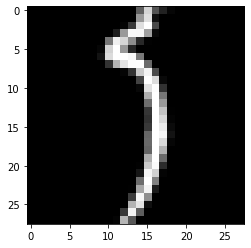


	====== Class: 3 ======


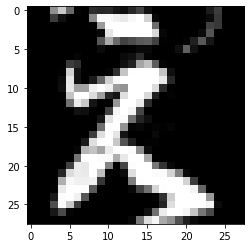


	====== Class: 4 ======


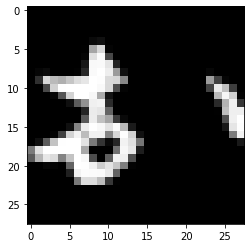


	====== Class: 5 ======


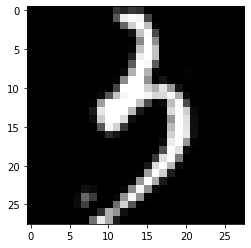


	====== Class: 6 ======


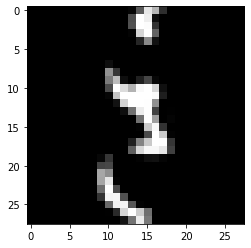


	====== Class: 7 ======


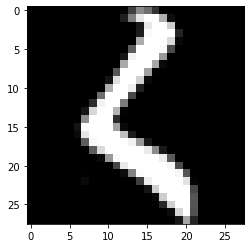


	====== Class: 8 ======


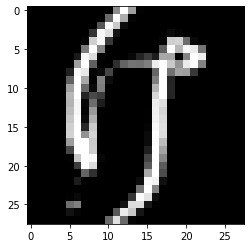


	====== Class: 9 ======


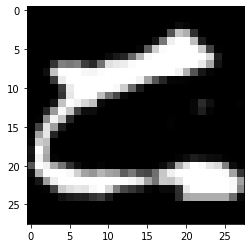


	====== Class: 10 ======


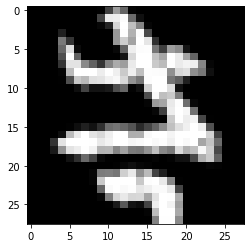


	====== Class: 11 ======


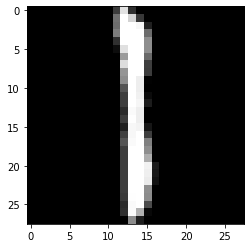


	====== Class: 12 ======


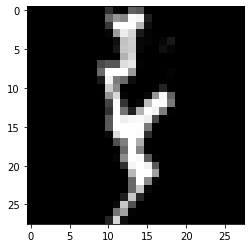


	====== Class: 13 ======


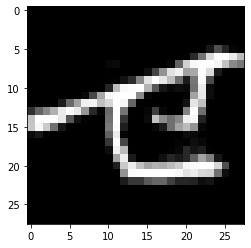


	====== Class: 14 ======


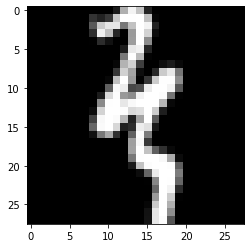


	====== Class: 15 ======


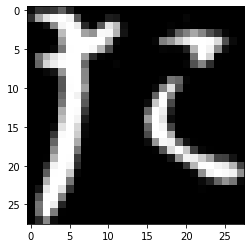


	====== Class: 16 ======


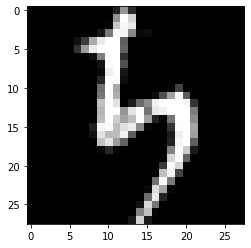


	====== Class: 17 ======


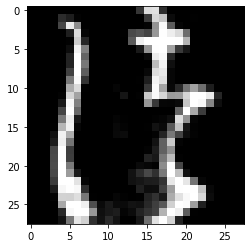


	====== Class: 18 ======


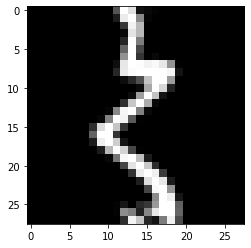


	====== Class: 19 ======


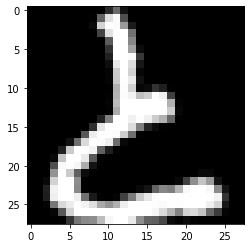

In [114]:
for cls in range(20):
    for j in range(len(train)):
        if (trainlabel.iloc[j]['0'] == cls):
            print("\n\t====== Class:",cls,"======")
            row = (train.iloc[j].to_numpy())
            row = np.delete(row, 0)
            display(row)
            break

تعداد تصاویر هر دسته در داده ی ترین و تست

Blue is Train
Orange is Test


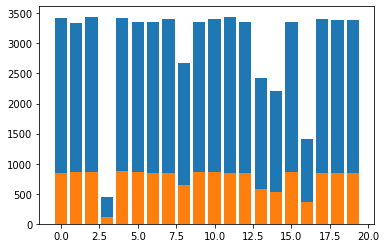

In [152]:
train_value_count = dict(trainlabel['0'].value_counts())
test_value_count = dict(testlabel['0'].value_counts())

#for train
keys = train_value_count.keys()
values = train_value_count.values()
plt.bar(keys, values)

#for test
keys = test_value_count.keys()
values = test_value_count.values()
plt.bar(keys, values)

print("Blue is Train")
print("Orange is Test")

حالا از ما خواسته شده که داده ها را طوری اسکیل کنیم که اعداد بین 0 و 1 باشند

یعنی روشنی هر پیکسل بین 0 و 1 باشد



In [245]:
df /= 255
dft /= 255

In [246]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.043137,0.011765,0.043137,0.007843,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.090196,0.647059,0.141176,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.05098,0.196078,0.184314,0.219608,0.368627,0.141176,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.015686,0.619608,...,1.000000,0.968627,0.768627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,0.298039,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
dft

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.576471,...,0.117647,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.011765,0.392157,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.121569,0.854902,0.168627,0.000000,0.000000,...,0.078431,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.835294,0.992157,0.380392,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.196078,0.713725,...,0.262745,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,0.796078,0.062745,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.011765,0.560784,0.996078,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


اگه این کار را نکنیم، در موقع حساب کردن گرادیان به مشکل میخوریم چون اعداد بزرگ باعث میشن تا گرادیان بیشتری به دست بیاد در نتیجه تغییر بیشتری ایجاد میشه که این باعث میشه عملکرد خوبی نداشته باشیم و همچنین امکان دارد که اعداد آنقدری بزرگ شوند که مشکل اورفلو پیدا کنیم در نتیجه اگه اعداد بین 0 و 1 باشند حساب کردن آن ها هم راحت تر است

حال تایپ دیتافریم هایی که داریم رو به float تبدیل میکنیم

# Phase #2

در این بخش باید کدی که به ما داده شده را کامل کنیم، که در بالا بخش هایی که

#todo

دارند رو کامل میکنیم

# Phase #3

# Training Sample Code

In [ ]:
# Sample code for building and training a model

INPUT_SHAPE = ...
LEARNING_RATE = ...
EPOCHS = ...
TRAINLOADER = ...
TESTLOADER = ...



network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(..., input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(..., activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

In [333]:
def sample(INPUT_SHAPE, LEARNING_RATE, EPOCHS, ACTIVATION, ACTIVATION_2, WEIGHT_INI, TRAINLOADER, TESTLOADER, HLS, LLS):
    network = FeedForwardNN(INPUT_SHAPE)
    network.add_layer(HLS, input_shape=INPUT_SHAPE, activation=ACTIVATION, WEIGHT_INI='uniform')
    network.add_layer(LLS, activation=ACTIVATION_2, WEIGHT_INI='uniform')
    network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

In [410]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, Relu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.5891357942430704	Average Loss: 7821.434726087326
	Test: Average Accuracy: 0.635904255319149	Average Loss: 6798.097671155551
Epoch 2:
	Train: Average Accuracy: 0.767557302771855	Average Loss: 6547.475485943774
	Test: Average Accuracy: 0.6836214539007093	Average Loss: 5934.972010412906
Epoch 3:
	Train: Average Accuracy: 0.8013059701492538	Average Loss: 5751.638505333208
	Test: Average Accuracy: 0.7089317375886524	Average Loss: 5295.354649828593
Epoch 4:
	Train: Average Accuracy: 0.8258761993603412	Average Loss: 5275.425581870237
	Test: Average Accuracy: 0.7320700354609928	Average Loss: 4888.387915554144
Epoch 5:
	Train: Average Accuracy: 0.8442997068230277	Average Loss: 5022.914164651561
	Test: Average Accuracy: 0.7506205673758864	Average Loss: 4873.528563168594
Epoch 6:
	Train: Average Accuracy: 0.8592750533049041	Average Loss: 4987.667733744974
	Test: Average Accuracy: 0.7575797872340425	Average Loss: 4864.638518312948
Epoch 7:
	Train: Average Accur

## قسمت دوم) وزن دهی شبکه

یک اتفاقی که میفته اینه اگه اگه تمامی وزن ها صفر باشند، یعنی تمامی وزن ها باهم برابرند و در آخر این باعث میشه که تمامی نورون ها مثل هم رفتار کنند

و همچنین اینکار باعث میشود که شبکه مینیموم های محلی را به درستی پیدا نکند

## قسمت سوم) تاثیر لرنینگ ریت

In [412]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.01, 20, Relu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.32017923773987206	Average Loss: 326.2401655475272
	Test: Average Accuracy: 0.3704122340425532	Average Loss: 424.85814907570034
Epoch 2:
	Train: Average Accuracy: 0.5519722814498934	Average Loss: 592.6712105316494
	Test: Average Accuracy: 0.5207668439716312	Average Loss: 770.7118912939453
Epoch 3:
	Train: Average Accuracy: 0.625049973347548	Average Loss: 785.678758013756
	Test: Average Accuracy: 0.5504654255319149	Average Loss: 850.8135327171618
Epoch 4:
	Train: Average Accuracy: 0.6552838486140725	Average Loss: 877.449902313687
	Test: Average Accuracy: 0.5599955673758864	Average Loss: 827.3148219552182
Epoch 5:
	Train: Average Accuracy: 0.6812533315565032	Average Loss: 964.8640039218814
	Test: Average Accuracy: 0.5789228723404255	Average Loss: 932.288762135191
Epoch 6:
	Train: Average Accuracy: 0.683618736673774	Average Loss: 1003.0467703372872
	Test: Average Accuracy: 0.5949468085106383	Average Loss: 1035.4397127473958
Epoch 7:
	Train: Average Accu

In [413]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.0001, 20, Relu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.11782049573560767	Average Loss: 13686.14964250787
	Test: Average Accuracy: 0.20791223404255318	Average Loss: 12978.920048964928
Epoch 2:
	Train: Average Accuracy: 0.427771855010661	Average Loss: 13384.56630465262
	Test: Average Accuracy: 0.45562943262411343	Average Loss: 12721.912893582925
Epoch 3:
	Train: Average Accuracy: 0.5945329157782516	Average Loss: 13206.142239366329
	Test: Average Accuracy: 0.5164228723404255	Average Loss: 12647.527724116331
Epoch 4:
	Train: Average Accuracy: 0.6521521855010661	Average Loss: 13167.694233890874
	Test: Average Accuracy: 0.5531028368794327	Average Loss: 12639.412859919199
Epoch 5:
	Train: Average Accuracy: 0.6838852611940298	Average Loss: 13156.968644714261
	Test: Average Accuracy: 0.5798980496453902	Average Loss: 12619.045468444452
Epoch 6:
	Train: Average Accuracy: 0.7027585287846482	Average Loss: 13137.666657053995
	Test: Average Accuracy: 0.5971852836879433	Average Loss: 12604.597047359071
Epoch 7:
	Train:

لرنینگ ریت یعنی اندازه قدمی که شبکه ما در هر قدم برمیدارد تا به مینیموم محلی برسد

حال اگه این عدد مقدار زیادی داشته باشد، سرعت ما بالا رفته ولی ممکن است جواب نهایی خوبی نگیریم چون قدم های بزرگتر باعث ایجاد این امکان میشوند که ما نقطه مورد نظر رو رد کنیم

در عین حال اگه قدم های کوچک تری برداریم، سرعت ما پایین آمده ولی در نهایت دقت خوبی میگیریم چون خیلی ریز و دقیق حرکت میکنیم

In [415]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.00001, 20, Relu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.061533848614072496	Average Loss: 13746.911170588639
	Test: Average Accuracy: 0.056848404255319146	Average Loss: 13181.79029065858
Epoch 2:
	Train: Average Accuracy: 0.06788046375266525	Average Loss: 13739.002854393751
	Test: Average Accuracy: 0.06881648936170212	Average Loss: 13174.021139129913
Epoch 3:
	Train: Average Accuracy: 0.08050706289978678	Average Loss: 13731.144571437026
	Test: Average Accuracy: 0.10981826241134751	Average Loss: 13166.351735056865
Epoch 4:
	Train: Average Accuracy: 0.10054637526652452	Average Loss: 13722.852536162098
	Test: Average Accuracy: 0.1074468085106383	Average Loss: 13158.281341310967
Epoch 5:
	Train: Average Accuracy: 0.12301772388059702	Average Loss: 13714.567734941458
	Test: Average Accuracy: 0.13368794326241135	Average Loss: 13150.092877380992
Epoch 6:
	Train: Average Accuracy: 0.14420642324093816	Average Loss: 13705.594045122085
	Test: Average Accuracy: 0.16207890070921988	Average Loss: 13141.096477274954
Epoc

0.001 لرنینگ ریت مناسبی است

## قسمت چهارم) تاثیر اکتیویشن فانکشن

In [416]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, Sigmoid(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.06949626865671642	Average Loss: 3586.843702365984
	Test: Average Accuracy: 0.10879875886524824	Average Loss: 3493.598067159495
Epoch 2:
	Train: Average Accuracy: 0.20279184434968017	Average Loss: 3264.7318341101936
	Test: Average Accuracy: 0.24756205673758863	Average Loss: 3116.4673211777426
Epoch 3:
	Train: Average Accuracy: 0.40626665778251597	Average Loss: 3052.6940839921226
	Test: Average Accuracy: 0.42440159574468084	Average Loss: 2967.908326006614
Epoch 4:
	Train: Average Accuracy: 0.5961820362473348	Average Loss: 2901.2716109467237
	Test: Average Accuracy: 0.5294104609929078	Average Loss: 2849.6732929687264
Epoch 5:
	Train: Average Accuracy: 0.6743736673773987	Average Loss: 2794.4614228509986
	Test: Average Accuracy: 0.5748448581560285	Average Loss: 2766.381561036301
Epoch 6:
	Train: Average Accuracy: 0.7111207356076759	Average Loss: 2732.088021139796
	Test: Average Accuracy: 0.6070700354609928	Average Loss: 2733.381870285825
Epoch 7:
	Train:

In [417]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, Tanh(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.10974147121535181	Average Loss: 3585.2095349865976
	Test: Average Accuracy: 0.20334663120567373	Average Loss: 3207.0700541880733
Epoch 2:
	Train: Average Accuracy: 0.43656716417910446	Average Loss: 2941.4996372564124
	Test: Average Accuracy: 0.4674867021276596	Average Loss: 2714.213781988893
Epoch 3:
	Train: Average Accuracy: 0.652235474413646	Average Loss: 2577.8859401870527
	Test: Average Accuracy: 0.59375	Average Loss: 2510.7282659838074
Epoch 4:
	Train: Average Accuracy: 0.730460421108742	Average Loss: 2453.5699539756392
	Test: Average Accuracy: 0.620811170212766	Average Loss: 2468.8363544477297
Epoch 5:
	Train: Average Accuracy: 0.7524320362473348	Average Loss: 2410.4832479309325
	Test: Average Accuracy: 0.6444813829787234	Average Loss: 2418.894071451527
Epoch 6:
	Train: Average Accuracy: 0.765674973347548	Average Loss: 2368.3095898263778
	Test: Average Accuracy: 0.654122340425532	Average Loss: 2393.856474401336
Epoch 7:
	Train: Average Accurac

In [423]:
BATCH_SIZE = 64
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, LeakyRelu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.5901352611940298	Average Loss: 7431.600145668082
	Test: Average Accuracy: 0.6344193262411348	Average Loss: 6387.3190304486025
Epoch 2:
	Train: Average Accuracy: 0.7698560767590619	Average Loss: 6047.014638945613
	Test: Average Accuracy: 0.6910460992907801	Average Loss: 5484.821266252391
Epoch 3:
	Train: Average Accuracy: 0.8095015991471215	Average Loss: 5449.234250346142
	Test: Average Accuracy: 0.7122783687943263	Average Loss: 5099.62674474823
Epoch 4:
	Train: Average Accuracy: 0.8309401652452025	Average Loss: 5114.824838917806
	Test: Average Accuracy: 0.7291001773049646	Average Loss: 4932.614818025825
Epoch 5:
	Train: Average Accuracy: 0.8464319029850746	Average Loss: 4987.768675827991
	Test: Average Accuracy: 0.7516179078014184	Average Loss: 4790.603063907494
Epoch 6:
	Train: Average Accuracy: 0.8569596215351812	Average Loss: 4877.960565929093
	Test: Average Accuracy: 0.7582668439716311	Average Loss: 4743.516688105999
Epoch 7:
	Train: Average Acc

برتری لیکی ریلو به ریلو این است که ما در ریلو مقادیر منفی را نادیده میگیریم و تبدیل به صفر میکنیم که این باعث میشود دقت کار ما پایین بیاید

ولی در لیکی ریلو مقادیر منفی را در عددی ضرب میکنیم تا آن ها را نیز داشته باشیم و تاثیر خودشون رو روی عمل ما بگذارند درنتیجه دقت بهتری خواهیم داشت

بهترین نتیجه رو لیکی ریلو به ما داد

## قسمت پنجم) تاثیر batch size

In [424]:
BATCH_SIZE = 16
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, LeakyRelu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.5887333333333333	Average Loss: 2322.089914243306
	Test: Average Accuracy: 0.6323294243070362	Average Loss: 1893.2405100436051
Epoch 2:
	Train: Average Accuracy: 0.76345	Average Loss: 1787.4103595920299
	Test: Average Accuracy: 0.6773054371002132	Average Loss: 1547.9043217928715
Epoch 3:
	Train: Average Accuracy: 0.7967	Average Loss: 1509.1523175774596
	Test: Average Accuracy: 0.7053571428571429	Average Loss: 1354.5725661685028
Epoch 4:
	Train: Average Accuracy: 0.81815	Average Loss: 1373.677264900904
	Test: Average Accuracy: 0.7222148187633263	Average Loss: 1300.2448503839398
Epoch 5:
	Train: Average Accuracy: 0.8357	Average Loss: 1311.6138680402444
	Test: Average Accuracy: 0.7365405117270789	Average Loss: 1256.7310233734624
Epoch 6:
	Train: Average Accuracy: 0.8479166666666667	Average Loss: 1291.411322642425
	Test: Average Accuracy: 0.7482675906183369	Average Loss: 1215.126314728297
Epoch 7:
	Train: Average Accuracy: 0.85815	Average Loss: 1272.2497

In [425]:
BATCH_SIZE = 32
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, LeakyRelu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.5888333333333333	Average Loss: 4467.742858416469
	Test: Average Accuracy: 0.6294420753375977	Average Loss: 3683.833466223259
Epoch 2:
	Train: Average Accuracy: 0.76485	Average Loss: 3477.691483004558
	Test: Average Accuracy: 0.689521144278607	Average Loss: 3065.737591141528
Epoch 3:
	Train: Average Accuracy: 0.80055	Average Loss: 3018.1536024044017
	Test: Average Accuracy: 0.7155961265103056	Average Loss: 2771.9346395409534
Epoch 4:
	Train: Average Accuracy: 0.8228666666666666	Average Loss: 2755.9466995686244
	Test: Average Accuracy: 0.7270788912579957	Average Loss: 2530.957886826783
Epoch 5:
	Train: Average Accuracy: 0.8403333333333334	Average Loss: 2606.5405582954913
	Test: Average Accuracy: 0.7427372068230277	Average Loss: 2410.750106049521
Epoch 6:
	Train: Average Accuracy: 0.8519333333333333	Average Loss: 2515.0928014067254
	Test: Average Accuracy: 0.759883617626155	Average Loss: 2414.8940222876704
Epoch 7:
	Train: Average Accuracy: 0.861616666

In [426]:
BATCH_SIZE = 256
TRAINLOADER = Dataloader(df, dfl, 20, batch_size = BATCH_SIZE, shuffle=True)
TESTLOADER = Dataloader(dft, dftl, 20, batch_size = BATCH_SIZE, shuffle=True)
sample(784, 0.001, 20, LeakyRelu(), Identical(), 'uniform', TRAINLOADER, TESTLOADER, 40, 20)

Epoch 1:
	Train: Average Accuracy: 0.3885859929078014	Average Loss: 3850.8325516853083
	Test: Average Accuracy: 0.5118302575825157	Average Loss: 4818.280042214114
Epoch 2:
	Train: Average Accuracy: 0.6563718971631205	Average Loss: 5375.676879380804
	Test: Average Accuracy: 0.5653085972346119	Average Loss: 5362.10478303904
Epoch 3:
	Train: Average Accuracy: 0.690237145390071	Average Loss: 5752.565535857146
	Test: Average Accuracy: 0.5962414975468332	Average Loss: 5671.955040509041
Epoch 4:
	Train: Average Accuracy: 0.7126662234042553	Average Loss: 6127.02700462114
	Test: Average Accuracy: 0.6081693242640499	Average Loss: 5913.19359319678
Epoch 5:
	Train: Average Accuracy: 0.7225786790780141	Average Loss: 6216.833266457465
	Test: Average Accuracy: 0.6175777765388046	Average Loss: 6097.999045997953
Epoch 6:
	Train: Average Accuracy: 0.7337710549645391	Average Loss: 6266.3198723719015
	Test: Average Accuracy: 0.6310109556199821	Average Loss: 6184.763802646689
Epoch 7:
	Train: Average Accur

مزایای بچ سایز کوچک این است که سرعت خوبی میگیریم ولی جواب خوبی نمیگیریم برای اینکه تمام محاسبات بر اساس یک بخش کوچکی صورت میگیرند

ولی بچ سایز بزرگتر نتیجه بهتری به ما میده ولی سرعت کم تری دارد